In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
from collections import Counter
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [32]:
path = '/home/viswanath/Desktop/Myfiles/AML/Capstone/Data/'
train_images = glob(path+'train/*jpg') # imports the train location/name of images
test_images = glob(path+'test/*jpg') # imports the test location/name of images
df = pd.read_csv(path+"train_label.csv") # save the label file

df["Image"] = df["Image"].map( lambda x : "/train/"+x) # append the image name to label
ImageToLabelDict = dict( zip( df["Image"], df["Id"])) # create a key value pair of image to id

In [33]:
df.shape

(9850, 2)

In [34]:
df.head()

,Image,Id
0,/train/00022e1a.jpg,w_e15442c
1,/train/000466c4.jpg,w_1287fbc
2,/train/00087b01.jpg,w_da2efe0
3,/train/001296d5.jpg,w_19e5482
4,/train/0014cfdf.jpg,w_f22f3e3


In [35]:
import os
import fnmatch
print('The number of images in the train data is:')
print(len(fnmatch.filter(os.listdir('/home/viswanath/Desktop/Myfiles/AML/Capstone/Data/train'), '*.jpg')))
print('The number of images in the test data is:')
print(len(fnmatch.filter(os.listdir('/home/viswanath/Desktop/Myfiles/AML/Capstone/Data/test'), '*.jpg')))

The number of images in the train data is:
9850
The number of images in the test data is:
15610


In [36]:
SIZE = 64
#image are imported with a resizing and a black and white conversion
def ImportImage( filename):
    img = Image.open(filename).convert("LA").resize( (SIZE,SIZE))
    return np.array(img)[:,:,0]
train_img = np.array([ImportImage( img) for img in train_images])
x = train_img

In [45]:
x[0]

array([[196, 210, 204, ..., 200, 193, 209],
       [198, 200, 182, ..., 201, 204, 196],
       [196,  17,  65, ..., 207, 212, 187],
       ...,
       [206, 183, 183, ..., 233, 213, 183],
       [210, 191, 204, ..., 243, 242, 216],
       [191, 193, 210, ..., 238, 231, 237]], dtype=uint8)

# Distribution of training sample across different classes

In [14]:
print('Number of categories: ',len(df['Id'].unique()) )

Number of categories:  4251


In [8]:
print( "%d training images" %x.shape[0])

print( "Nbr of samples/class\tNbr of classes")
for index, val in df["Id"].value_counts().value_counts().sort_index().iteritems():
    print( "%d\t\t\t%d" %(index,val))

9850 training images
Nbr of samples/class	Nbr of classes
1			2220
2			1034
3			492
4			192
5			102
6			61
7			40
8			23
9			21
10			9
11			7
12			7
13			9
14			5
15			4
16			5
17			4
18			2
19			2
20			1
21			3
22			3
23			1
26			1
27			1
34			1
810			1


In [17]:
size_buckets = Counter(df['Id'].value_counts().values)

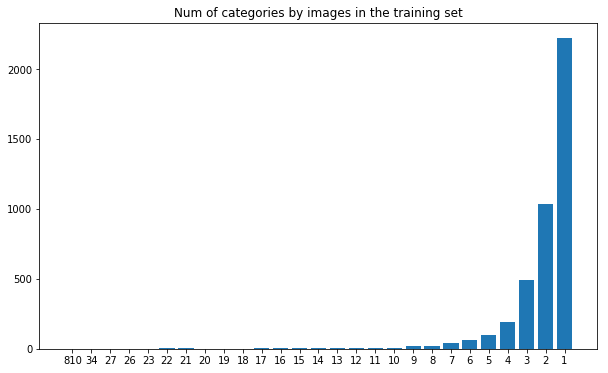

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")
plt.show()

In [19]:
df['Id'].value_counts().head()

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
Name: Id, dtype: int64

In [40]:
INPUT_DIR = '/home/viswanath/Desktop/Myfiles/AML/Capstone/Data'

In [43]:
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))
    cols = len(imgs) // rows + 1
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(INPUT_DIR+filename) for filename in filenames]
    return plot_images(imgs, labels, rows)

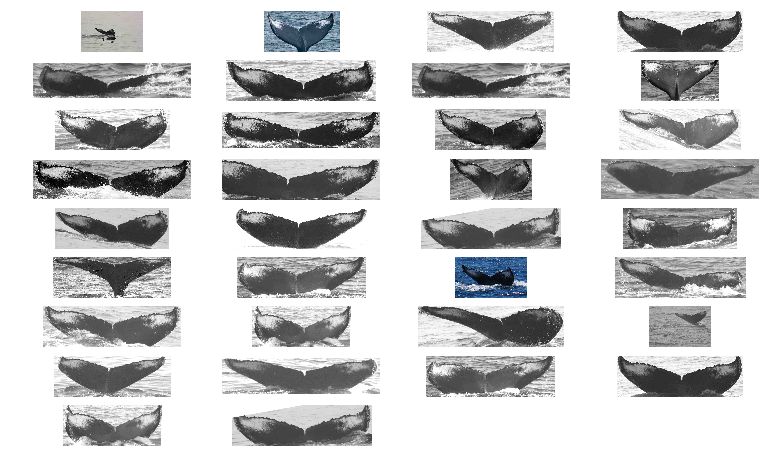

In [44]:
w_1287fbc = df[df['Id'] == 'w_1287fbc']
plot_images_for_filenames(list(w_1287fbc['Image']), None, rows=9)

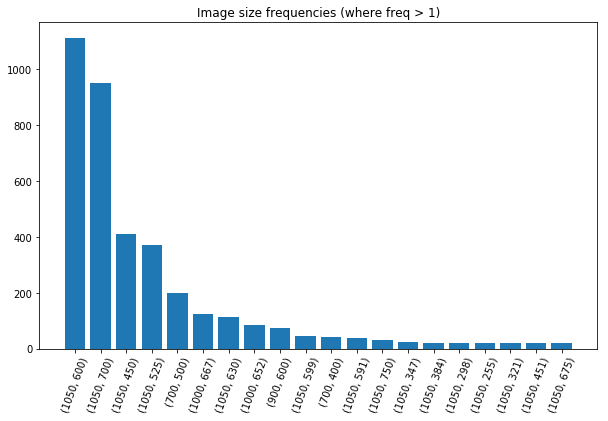

In [47]:
img_sizes = Counter([Image.open(INPUT_DIR+i).size for i in df['Image']])
size, freq = zip(*Counter({i: v for i, v in img_sizes.items() if v > 1}).most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)
plt.title("Image size frequencies (where freq > 1)")
plt.show()